# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from pprint import pprint
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'c29801fe365bbfc949b6a222396791e6'

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
 
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# lat and long tuples
lat_lngs = zip(lats, lngs)
 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add unique cities to cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)


592

In [5]:
# Build query URL
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=c29801fe365bbfc949b6a222396791e6&units=metric&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create empty lists
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

record_counter = 0
set_counter = 0

# Starting URL for Weather Map API Call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url_city = query_url + city
    # Get weather data
    response = requests.get(query_url_city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        new_cities.append(response['name'])
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 2 of set 0 | stony plain
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 3 of set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 4 of set 0 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 5 of set 0 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
City not found!
Processing record 6 of set 0 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 7 of set 0 | lompoc
http://api.openweat

Processing record 8 of set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 9 of set 1 | santa ana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 10 of set 1 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 11 of set 1 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 12 of set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
City not found!
Processing record 13 of set 1 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 14 of set 1 | gidam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396

Processing record 14 of set 2 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 15 of set 2 | contla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 16 of set 2 | bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 17 of set 2 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 18 of set 2 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 19 of set 2 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 20 of set 2 | caucaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Pr

Processing record 21 of set 3 | vagur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 22 of set 3 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 23 of set 3 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 24 of set 3 | ilebo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 25 of set 3 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 26 of set 3 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 27 of set 3 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
City not fo

Processing record 28 of set 4 | atbasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 29 of set 4 | matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 30 of set 4 | kajiado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 31 of set 4 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 32 of set 4 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 33 of set 4 | lastoursville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 34 of set 4 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Proces

Processing record 35 of set 5 | lensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 36 of set 5 | williston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 37 of set 5 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 38 of set 5 | saryshagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
City not found!
Processing record 39 of set 5 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 40 of set 5 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 41 of set 5 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396

Processing record 42 of set 6 | klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 43 of set 6 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 44 of set 6 | gorno-chuyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
City not found!
Processing record 45 of set 6 | tarata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 46 of set 6 | malanville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 47 of set 6 | zhoucheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 48 of set 6 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc94

Processing record 49 of set 7 | khuzdar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 50 of set 7 | gold coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 0 of set 8 | ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 1 of set 8 | tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 2 of set 8 | yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 3 of set 8 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 4 of set 8 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing reco

Processing record 4 of set 9 | chistogorskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 5 of set 9 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 6 of set 9 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 7 of set 9 | chilca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 8 of set 9 | gijon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 9 of set 9 | honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 10 of set 9 | santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6

Processing record 11 of set 10 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 12 of set 10 | bogale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 13 of set 10 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 14 of set 10 | homocea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 15 of set 10 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 16 of set 10 | livingston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 17 of set 10 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6

Processing record 17 of set 11 | marfino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 18 of set 11 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 19 of set 11 | wexford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 20 of set 11 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 21 of set 11 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 22 of set 11 | smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a222396791e6
Processing record 23 of set 11 | nueva imperial
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c29801fe365bbfc949b6a2223967

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create a dictionary
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Max_Temp": max_temp,
    "Lat": lat,
    "Lng": lng,   
    "Wind_Speed": wind_speed
}

# Create a dataframe of the dictionary
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Max_Temp,Lat,Lng,Wind_Speed
0,Ponta Delgada,75,PT,1588039151,93,17.00,37.73,-25.67,6.20
1,Stony Plain,75,CA,1588039151,37,12.00,53.53,-114.00,3.60
2,Rikitea,25,PF,1588039151,82,25.08,-23.12,-134.97,6.03
3,Talnakh,25,RU,1588039151,85,-6.00,69.49,88.40,4.00
4,Grindavik,75,IS,1588039152,75,5.00,63.84,-22.43,0.50


In [8]:
# Convert temperature from Celsius to Fahrenheit
weather_data["Max_Temp"] = weather_data["Max_Temp"].apply(lambda x: (x * (9/5)) + 32)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Max_Temp,Lat,Lng,Wind_Speed
0,Ponta Delgada,75,PT,1588039151,93,62.600,37.73,-25.67,6.20
1,Stony Plain,75,CA,1588039151,37,53.600,53.53,-114.00,3.60
2,Rikitea,25,PF,1588039151,82,77.144,-23.12,-134.97,6.03
3,Talnakh,25,RU,1588039151,85,21.200,69.49,88.40,4.00
4,Grindavik,75,IS,1588039152,75,41.000,63.84,-22.43,0.50


In [9]:
# Export dataframe to csv file
weather_data_df = weather_data.to_csv("output_data/weather_data_df.csv", index=False, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

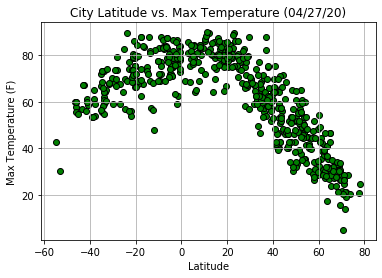

In [10]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"], marker="o", edgecolor="black", color = "green")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#Save picture
plt.savefig("output_data/temperature.png")

#Show Plot
plt.show()

#### Latitude vs. Humidity Plot

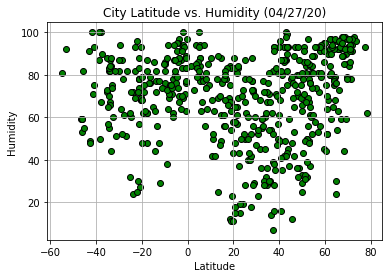

In [11]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor="black", color = "green")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

#Save picture
plt.savefig("output_data/humidity.png")

#Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

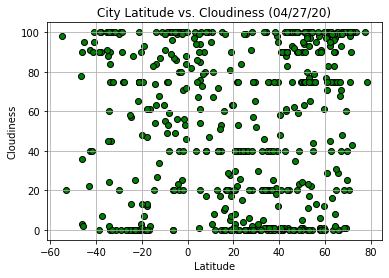

In [12]:
# Create a scatter plot for latitude and cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor="black", color = "green")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

#Save picture
plt.savefig("output_data/cloudiness.png")

#Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

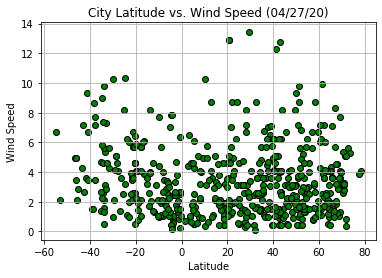

In [13]:
# Create a scatter plot for latitude and wind speed
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"], marker="o", edgecolor="black", color = "green")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

#Save picture
plt.savefig("output_data/wind_speed.png")

#Show Plot
plt.show()